In [4]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import pandas as pd
import time


In [8]:
boxes_LS=pd.read_csv('boxes_LS_1x1_eNATL60.csv',sep = '\t',index_col=0)
latmin_LS=boxes_LS['latmin']
latmax_LS=boxes_LS['latmax']
lonmin_LS=boxes_LS['lonmin']
lonmax_LS=boxes_LS['lonmax']
box_name=boxes_LS.index

In [10]:
boxes_LS['latmin'][box_name[0]]

55.015336990356452

In [21]:
transform = ccrs.PlateCarree()

pltargs = {
   'transform' : transform,
   'color' : 'black',
   'linewidth' : 2}

def plot_individual_box(box_pd,i,ax=None):
    x1 = box_pd['lonmin'][box_name[i]]
    x2 = box_pd['lonmax'][box_name[i]]
    y1 = box_pd['latmin'][box_name[i]]
    y2 = box_pd['latmax'][box_name[i]]
    ax.plot([x1, x2], [y1, y1],**pltargs)
    ax.plot([x1, x2], [y2, y2],**pltargs)
    ax.plot([x1, x1], [y1, y2],**pltargs)
    ax.plot([x2, x2], [y1, y2],**pltargs)
    ax.text((x1+x2)/2-0.4,(y1+y2)/2-0.1,box_name[i])


def plot_boxes(box_pd,xmin,xmax,ymin,ymax,textbox=None,title=None):
    plt.figure(figsize=(15,10))
    proj = transform
    ax = plt.axes(projection=proj)
    ax.stock_img()
    for i in range(len(box_pd.index)):
        plot_individual_box(box_pd,i,ax=ax)
    ax.coastlines(resolution="10m")

    # grid lines
    gl = ax.gridlines(draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    gl.xlabel_style = label_style
    gl.xlabels_bottom = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90,10,5,dtype=float))

    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(20,80,5,dtype=float))


    #ax.grid(False)
    plt.xlim((xmin,xmax))
    plt.ylim((ymin,ymax))
    if textbox is not None:
        # see http://matplotlib.org/users/annotations_guide.html
        props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor="black", lw=2)
        ax.text(0.05, 0.10, textbox, transform=ax.transAxes, fontsize=18,verticalalignment='top',bbox=props)
    if title is not None:
        plt.title(title,fontsize=20,y=1.08)

       


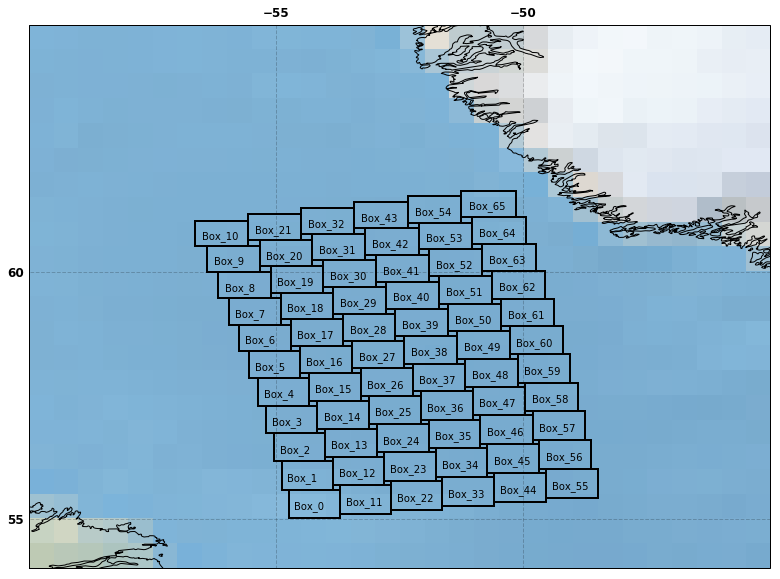

In [23]:
plot_boxes(boxes_LS,-60,-45,54,65,textbox=None,title=None)
plt.savefig('test_map_boxes_1x1_LS.png')

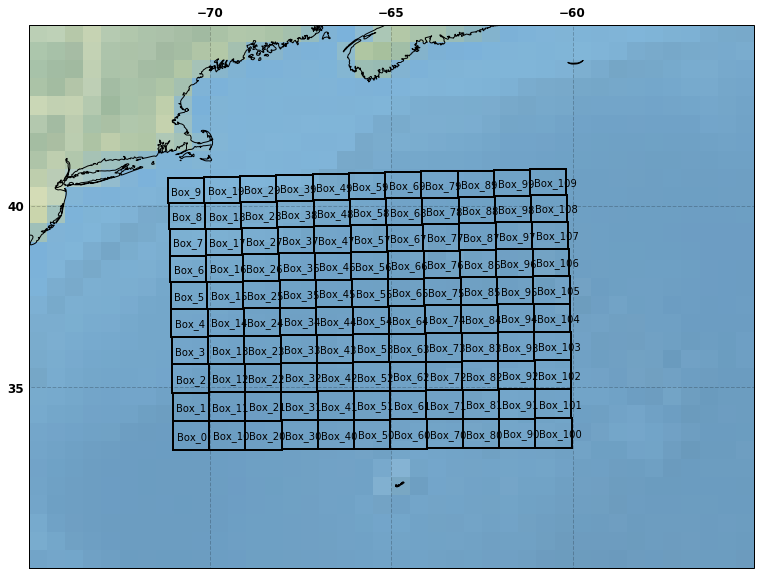

In [26]:
boxes_GS=pd.read_csv('boxes_GS_1x1_eNATL60.csv',sep = '\t',index_col=0)
latmin_GS=boxes_GS['latmin']
latmax_GS=boxes_GS['latmax']
lonmin_GS=boxes_GS['lonmin']
lonmax_GS=boxes_GS['lonmax']
box_name=boxes_GS.index

plot_boxes(boxes_GS,-75,-55,30,45,textbox=None,title=None)
plt.savefig('test_map_boxes_1x1_GS.png')

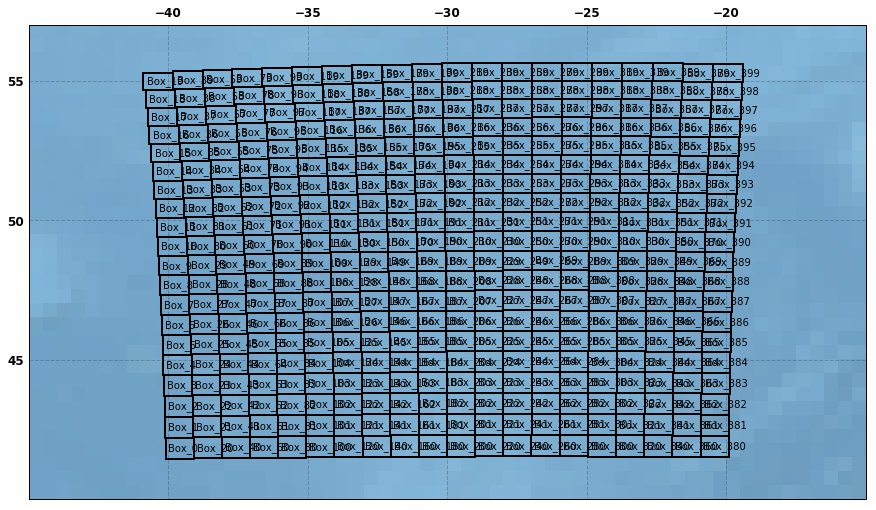

In [28]:
boxes_MNA=pd.read_csv('boxes_MNA_1x1_eNATL60.csv',sep = '\t',index_col=0)
latmin_MNA=boxes_MNA['latmin']
latmax_MNA=boxes_MNA['latmax']
lonmin_MNA=boxes_MNA['lonmin']
lonmax_MNA=boxes_MNA['lonmax']
box_name=boxes_MNA.index

plot_boxes(boxes_MNA,-45,-15,40,57,textbox=None,title=None)
plt.savefig('test_map_boxes_1x1_MNA.png')